# Introduction to binary classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc


 We have data from multiple brain scans for patients. We are trying to classify the patients into two categories (0 or 1 GOLD lesions) based on data from the scan (FLAIR).

In [2]:
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
dat.head(4)

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


GOLD_Lesions
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: FLAIR, dtype: object

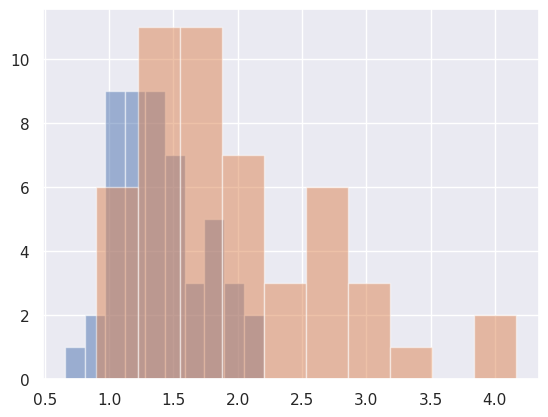

In [3]:
dat.groupby('GOLD_Lesions').FLAIR.hist(alpha= .5)

/tmp/ipykernel_13540/2728398301.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
/home/ghassan_unix/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13540/2728398301.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
/home/ghassan_unix/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

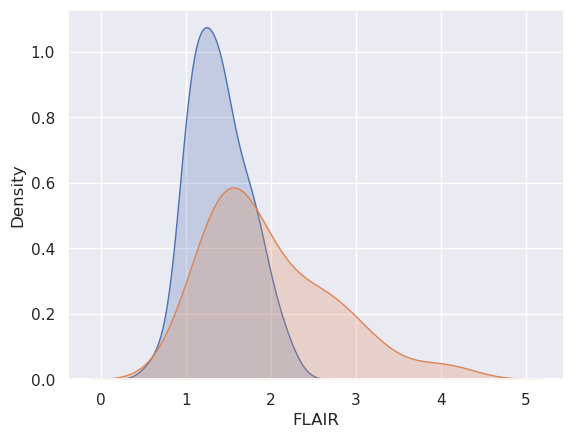

In [4]:
x0 = dat.FLAIR[dat.GOLD_Lesions == 0]
x1 = dat.FLAIR[dat.GOLD_Lesions == 1]
x2 = dat.FLAIR
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.show()

# Classification

We see from the plot that there is some segregation based on the FLAIR value between 0 and 1 observations so we expect a binary classifier based on FLAIR to do well.

In [13]:
x = dat.FLAIR
y = dat.GOLD_Lesions
n = len(x)
trainFraction = .75

## Build a training and testing set
## Prob of being in the train set is trainFraction
sample = np.random.uniform(size = n) < trainFraction

## Get the training and testing sets
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]



Trying to find the optimal threshold based on the training data.

In [15]:
## Starting values, just set it to 
## 0 so that it improves on the first
## try
bestAccuracySoFar = 0

for t in np.sort(xtrain):
  ## Strictly greater than the threshold is
  ## our algorithm
  predictions = (xtrain > t)
  accuracy = np.mean(ytrain == predictions)
  if (accuracy > bestAccuracySoFar):
    bestThresholdSoFar = t 
    bestAccuracySoFar = accuracy 

threshold = bestThresholdSoFar
  

## Definitions
test set **accuracy** = proportion of correct classifications on the test data. However, this measure is very dependent on the rate of positives in the data. For example, if you have only 0.01% people with HIV, then a guesser that just assigns everyone as negative already has 99.99% accuracy.

We can thus define the **free accuracy** which is the higher of the two percentages of negative and positive in the data. If the model cannot beat the free accuracy, it is useless.

test set **sensitivity**, or true positive rate (TPR) = proportion declared diseased among those that are actually diseased. (In this case lesion = disease): $ P(\hat{y_i}=1|y_i=1)$

test set **specificity**, or true negative rate (TNR) = proportion declared not diseased among those that are actually not diseased: $ P(\hat{y_i}=0|y_i=0)$

For the ROC curve, we also define the **false positive rate (FPR)** which is equal to 1-TNR = 1-specificity.

In [7]:
## Let's test it out on the test set
testPredictions = (xtest > threshold)

## The test set accuracy
testAccuracy = np.mean(testPredictions == ytest)

sub0 = ytest == 0
sub1 = ytest == 1

testSpec = np.mean(ytest[sub0] == testPredictions[sub0])
testSens = np.mean(ytest[sub1] == testPredictions[sub1])

pd.DataFrame({ 'Threshold': threshold, 'Accuracy': testAccuracy,  'Specificity': testSpec, 'Sensitivity': testSens}, index = [0])

,Threshold,Accuracy,Specificity,Sensitivity
0,1.4632,0.75,0.785714,0.714286


/tmp/ipykernel_13540/2742163068.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
/home/ghassan_unix/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13540/2742163068.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
/home/ghassan_unix/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

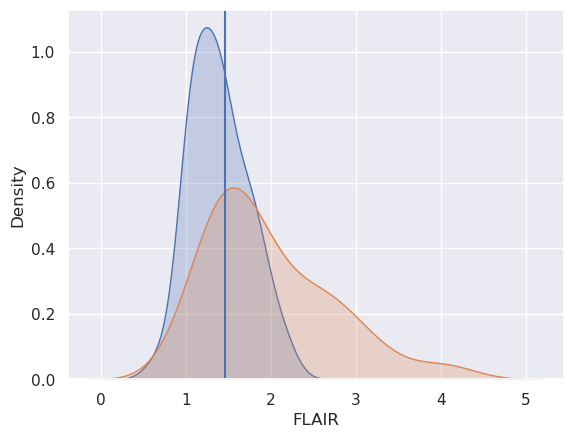

In [8]:
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.axvline(x=threshold)
            
plt.show()

#### ROC curve

An ROC curve shows us how the the sensitivity and the specificity vary depending on the threshold we use to classify the cases.To draw an ROC curve, we calculate the probabilities os ytest using the model. For every threshold we choose between 0 and 1, we calculate sensitivity (tpr) and 1 - specificity (false positive rate).

The ROC curve has some mathematical properties:
- it is always increasing
- the y-axis is TPR and x-axis is FPR.
- it always starts at (0,0): this corresponds to a threshold of 1, we classify no observation as positive so the true positive rate is 0. Since we classify all observations at 0, the true negative rate is 1 so the FPR is 1-1=0
- it always ends at (1,1): This corresponds to a threshold of 0, so we classify all observations as positive. The true positive rate is 1 and the true negative rate is 0 so the FPR is 1-0=1
- The ROC of a random guesser with no information is a straight line from (0,0) and (1,1)
- The ROC of the perfect classifier has a hyperbolic shape and gets very close to the point (0,1)
- ROC curves below the straight line actively make the opposite prediction (maybe you switched the labels?)
- The area under the curve (AUC) of a ROC is considered a measure to evaluate the model. High values of AUC (close to 1) are for very good models.

**Note:** The ROC curve below does not calculate fpr,tpr for different thresholds of probability calculated using logistic reactions but rather just on thresholds of the variable FLAIR

In [11]:
fpr, tpr, thresholds = roc_curve(ytest, xtest)
roc_auc = auc(fpr, tpr)
thresholds

array([5.16529417, 4.16529417, 2.09999347, 1.74640751, 1.58944571,
       1.57865214, 1.44785213, 1.40784776, 1.35432374, 1.30604959,
       1.29979491, 1.15359986, 1.15259039, 0.94935507])

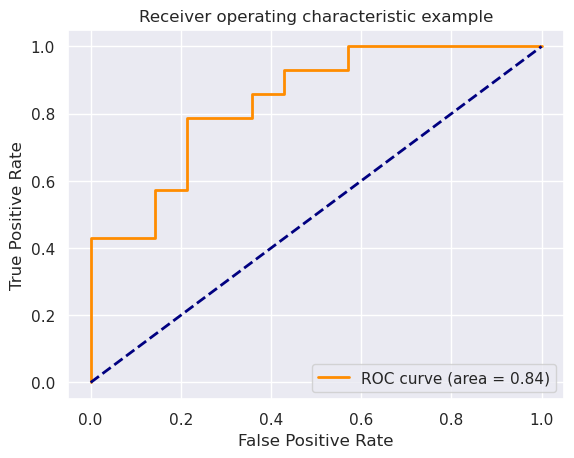

In [10]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()